In [158]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown, Latex, Image

from sklearn.model_selection import train_test_split

import markdown2
import tabulate

import pandas_explore as exp

In [160]:
# Titanic data
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic = (df_titanic
 .astype({'Survived':'object', 'Pclass':'object'})
)
df_titanic_train, df_titanic_test = train_test_split(df_titanic, test_size=0.2)
df_titanic_test = df_titanic_test.drop(columns=['Survived'])

In [161]:
# Diamonds data
df_diamonds = pd.read_csv('./data/diamonds.csv')
df_dia_train, df_dia_test = train_test_split(df_diamonds, test_size=0.2)

# Plot Concept

+ plot_num2num
    - 수치형 변수로 수치형 변수의 분포를 파악
    - 다이아몬드 캐럿의 크기와 가격의 분포
    - df, num_col, target_col, hue=None, shape=None
    - scatter plot
+ plot_cat2num
    - 카테고리형 변수로 수치형 변수의 분포를 파악
    - 다이아몬드 색상에 따른 가격대의 분포
    - df, cat_col, target_col
    - box plot
+ plot_cat2cat
    - 카테고리형 변수로 카테고리형 변수의 분포를 파악
    - 객실등급에 따른 생존률 분포
    - df, cat_col, target_col, opt_col(C x C -> C)
    - 옵션 : sample count, normalized count
    - bar plot
+ plot_cats2num
    - 카테고리형 변수의 조합별 수치형 변수의 분포
    - 생존여부, 객실등급별 연령대의 분포
    - df, cat_cols, num_col
    - histogram
+ plot_num2cat
    - 수치형 변수로 카테고리형 변수의 분포를 파악
    - 평균 3개월 ARPU에 따른 해지 분포
    - df, num_col, target_col, 
    - histogram, kde plot
+ plot_cats2binary
    - 카테고리형 변수의 조합별 이진값(예. 0,1)의 변화
    - df, cat_cols, target_col

## 1. plot.num2num

In [162]:
exp.num2num(df_dia_train, 'carat', 'price', save_only=True, figsize=(6,4))

'img/num2num_carat_4811ffb4-30ec-4fd2-a055-c822c885e493.png'

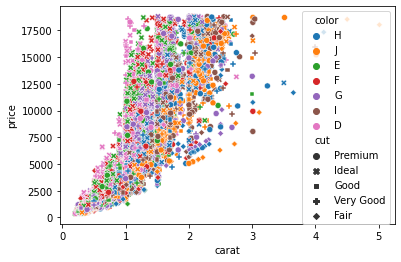

In [163]:
exp.num2num(df_dia_train, 'carat', 'price', hue='color', style='cut', bypass=False, figsize=(6,4))

## 2. plot.cat2num

In [164]:
exp.cat2num(df_dia_train, 'color', 'price', save_only=True)

'img/cat2num_color_ed4ddd7e-0f7b-485b-9cbe-a5a9e8b3e820.png'

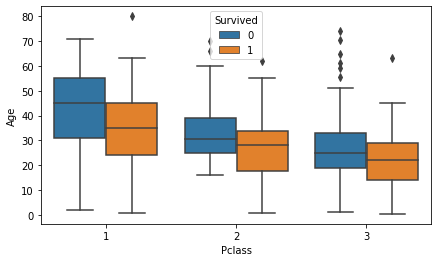

In [165]:
exp.cat2num(df_titanic, 'Pclass', 'Age', hue='Survived', figsize=(7,4))

## 3. plot.num2hist

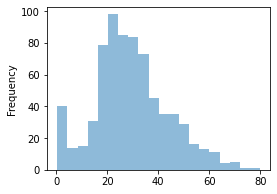

In [175]:
exp.num2hist(df_titanic, 'Age', figsize=(4,3))

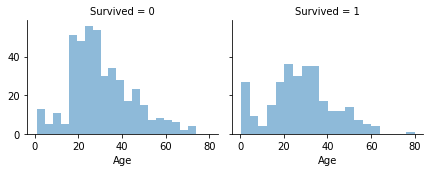

In [176]:
exp.num2hist(df_titanic, 'Age', ['Survived'], figsize=(3,2.5))

In [172]:
exp.num2hist(df_titanic, 'Age', ['Survived'], figsize=(3,2), save_only=True)

'img/num2hist_Age_da723108-8b4d-4e30-981e-a3c84dad6c56.png'

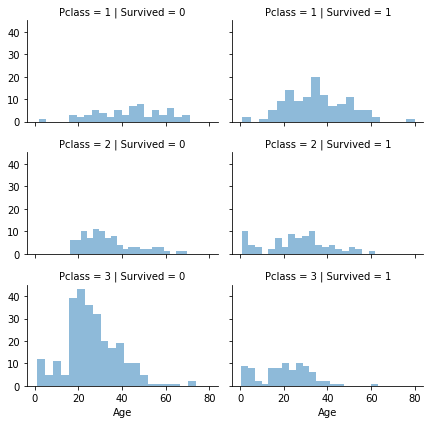

In [173]:
exp.num2hist(df_titanic, 'Age', ['Survived', 'Pclass'], figsize=(3,2))

In [174]:
exp.num2hist(df_titanic, 'Age', ['Survived', 'Pclass'], figsize=(3,2), save_only=True)

'img/num2hist_Age_124fa39b-6986-47ff-99e8-57e086b60f9d.png'

## 4. plot.cat2cat

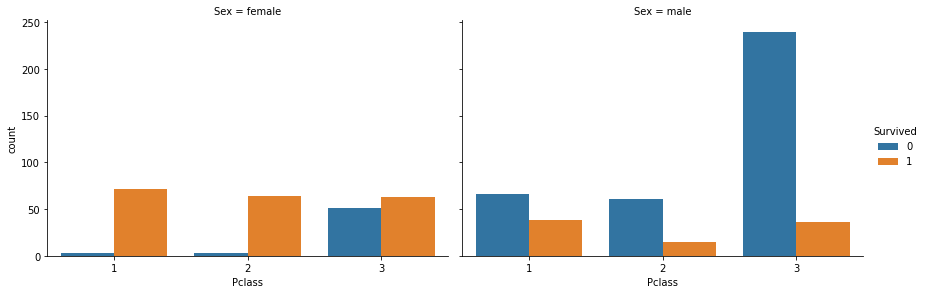

In [70]:
exp.cat2cat(df_titanic_train, 'Pclass', 'Survived', col='Sex', figsize=(6,4))

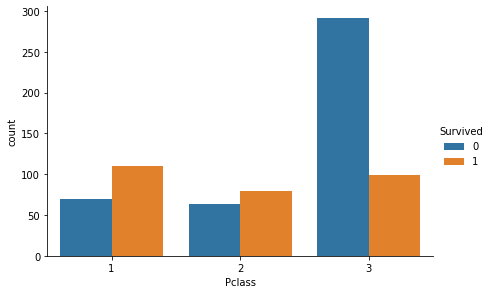

In [66]:
exp.cat2cat(df_titanic_train, 'Pclass', 'Survived')

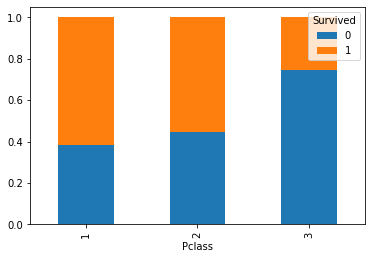

In [67]:
exp.cat2cat(df_titanic_train, 'Pclass', 'Survived', normalized=True)

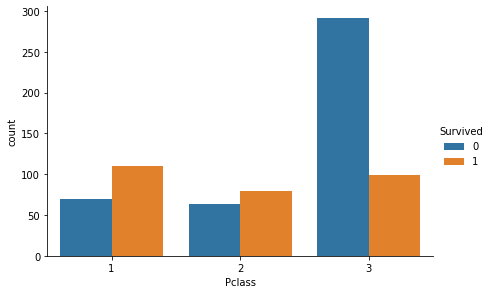

In [68]:
exp.cat2cat(df_titanic_train, 'Pclass', 'Survived', normalized=False, save_only=False)

## 5. plot.num2cat

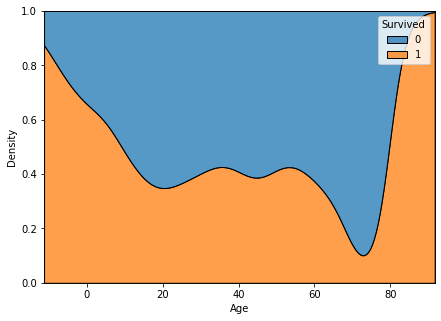

In [60]:
exp.num2cat(df_titanic, 'Age', 'Survived', multiple='fill')

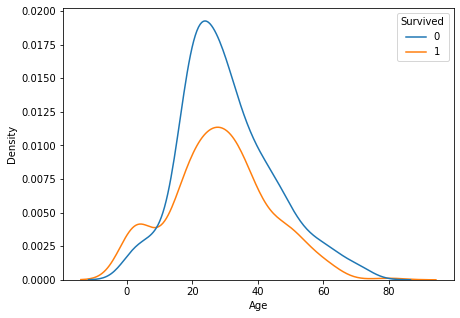

In [61]:
exp.num2cat(df_titanic, 'Age', 'Survived', multiple='layer')

## 6. plot.cats2binary

1) category nums == 3

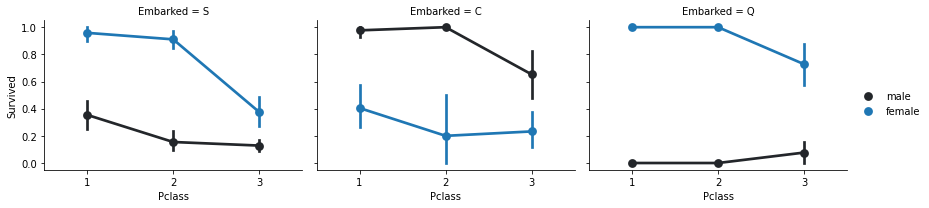

In [62]:
exp.cats2binary(df_titanic, ['Pclass', 'Sex', 'Embarked'], 'Survived', figsize=(4,3))

2) category nums == 2

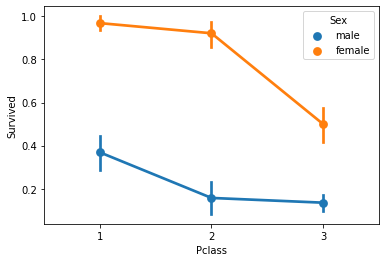

In [63]:
exp.cats2binary(df_titanic, ['Pclass', 'Sex'], 'Survived')

3) category nums == 1

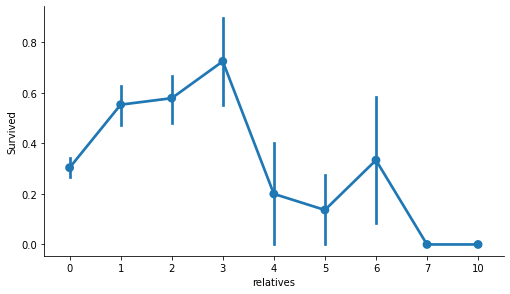

In [64]:
exp.cats2binary(df_titanic.assign(relatives = lambda df: df.Parch + df.SibSp), ['relatives'], 'Survived', figsize=(7,4))

## etc. 

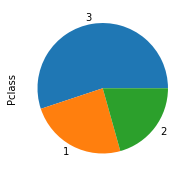

In [182]:
exp.cat2pie(df_titanic, 'Pclass', figsize=(3,3))